In [29]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
# dataframes creation for both training and testing datasets 
iris_df = pd.read_csv('iris.csv')


In [31]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

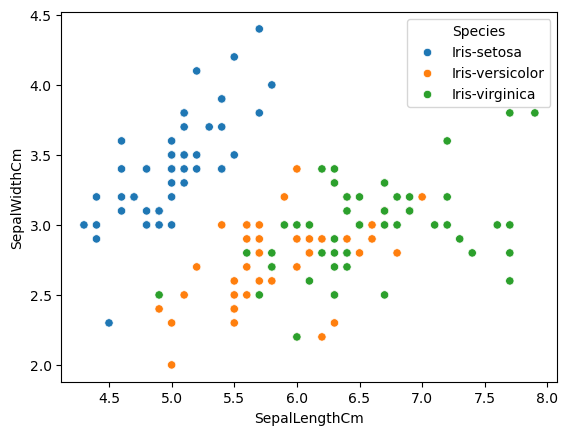

In [32]:
sns.scatterplot( x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = iris_df)

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

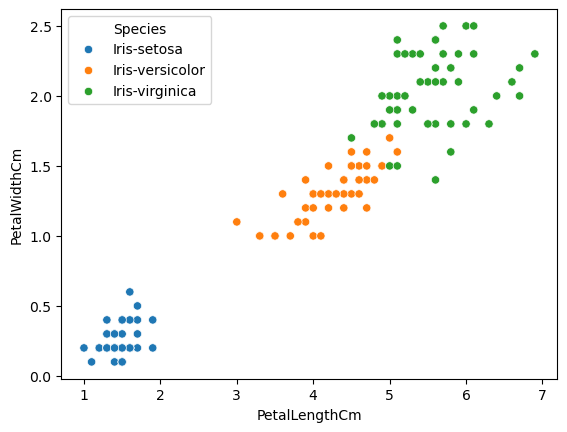

In [33]:
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = iris_df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

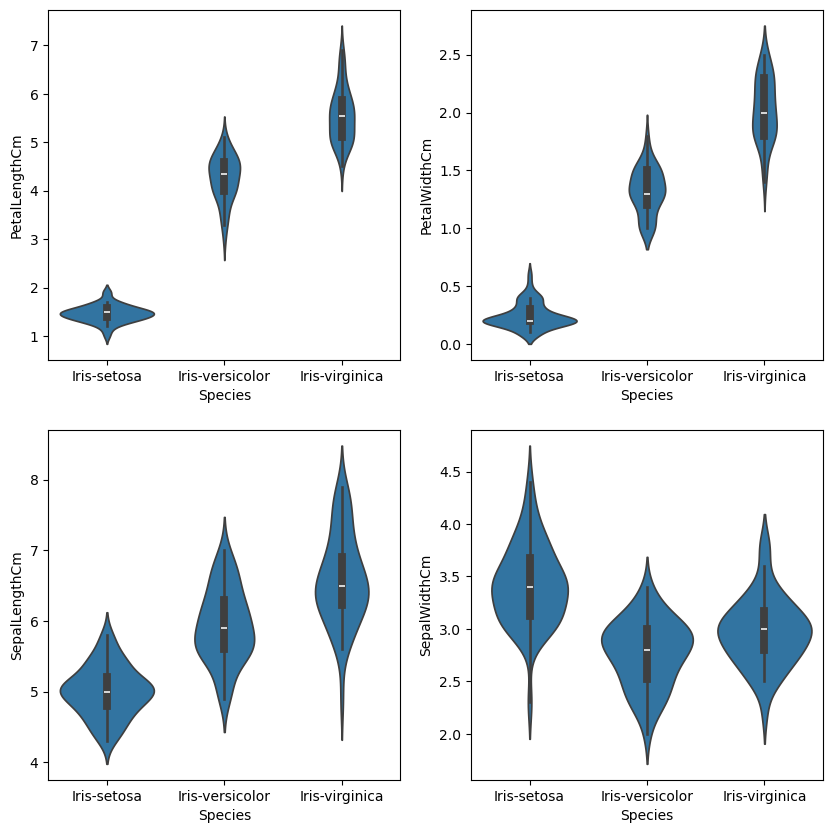

In [34]:
# Let's show the Violin plot 
# A violin plot would show the distribution of sepal/petal lengths/widths for each species, 
# highlighting the density, range, and potential skewness of the data.

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_df)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_df)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_df)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_df)

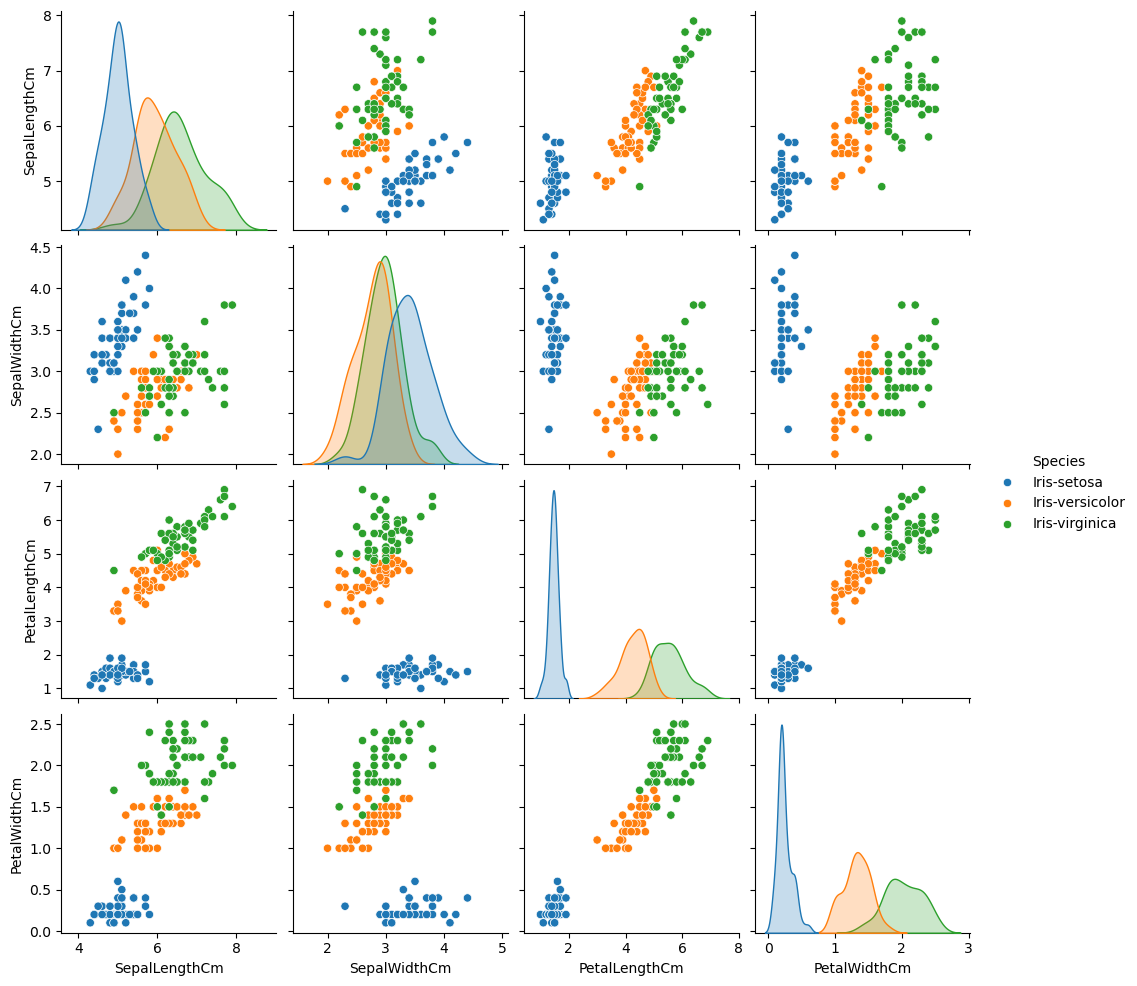

In [35]:
sns.pairplot(iris_df, hue = 'Species')

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


<Axes: >

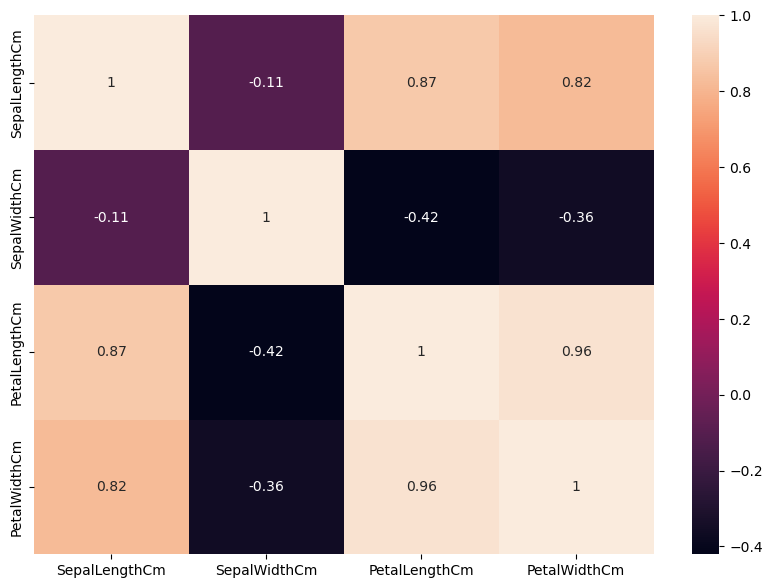

In [36]:
# Let's check the correlation between the variables 
plt.figure(figsize=(10,7)) 
print(iris_df.dtypes)
numeric_df = iris_df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True)


In [37]:
# Let's drop the ID and Species (target label) coloumns
X = iris_df.drop(['Species'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [38]:
y = iris_df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [39]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35)

In [40]:
X_train.shape

(97, 4)

In [41]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
36,5.5,3.5,1.3,0.2
145,6.7,3.0,5.2,2.3
124,6.7,3.3,5.7,2.1
53,5.5,2.3,4.0,1.3
127,6.1,3.0,4.9,1.8


In [42]:
y_train

36         Iris-setosa
145     Iris-virginica
124     Iris-virginica
53     Iris-versicolor
127     Iris-virginica
            ...       
123     Iris-virginica
70     Iris-versicolor
148     Iris-virginica
82     Iris-versicolor
5          Iris-setosa
Name: Species, Length: 97, dtype: object

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [44]:
y_predict = classifier.predict(X_test)
confusion_matrix(y_test, y_predict)


array([[19,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 19]], dtype=int64)